# Evaluating Empirically Confidence Intervals

Here we'll test empirically what we explained about confidence intervals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt



We will start by generating data randomy from a normal distribution. We take 100 million points, which is quite a large sample, so the sample mean should get very close to the *population* mean.

10.000267468745378
1.999925194016005


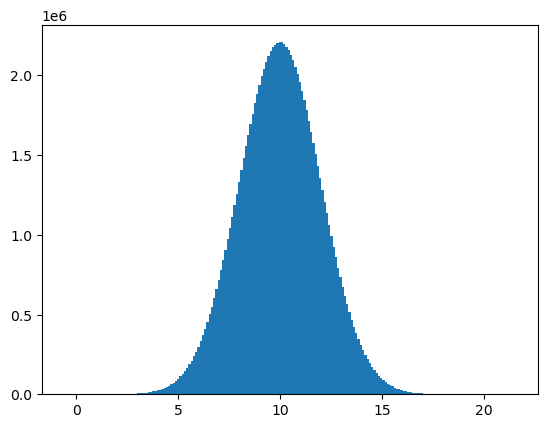

In [4]:
mu = 10
sigma = 2
M = 100000000
np.random.seed(10)
X = mu + sigma*np.random.randn(M)
plt.hist(X, 200)
print(np.mean(X))
print(np.std(X))

Now, for smaller samples, let's say 100; let's compute when the 90, 95, and 95% CI should be:



In [4]:
N = 100
CI_90 = [10 - 1.645 * 2/np.sqrt(N), 10 + 1.645 * 2/np.sqrt(N)]
CI_95 = [10 - 1.96 * 2/np.sqrt(N), 10 + 1.96 * 2/np.sqrt(N)]
CI_99 = [10 - 2.58 * 2/np.sqrt(N), 10 + 2.58 * 2/np.sqrt(N)]
print(CI_90, CI_95, CI_99)

[9.671, 10.329] [9.608, 10.392] [9.484, 10.516]


Take random samples and compute the means:

Warning!<br>
- $N=100$ is the size of each sample<br>
- $K = 10000$ is the number of samples I measure to plot a sampling distribution


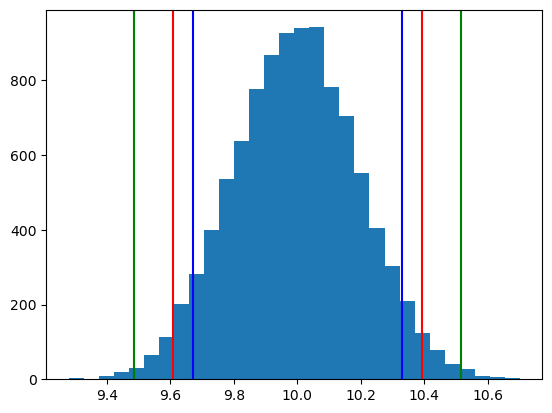

In [5]:
N = 100
K = 10000
sample_means=np.zeros(K)
for i in range(K):
    s = np.random.choice(X, N)
    sample_means[i]=np.mean(s)

plt.hist(sample_means, 30)
plt.axvline(CI_90[0], color='b')
plt.axvline(CI_90[1], color='b')
plt.axvline(CI_95[0], color='r')
plt.axvline(CI_95[1], color='r')
plt.axvline(CI_99[0], color='g')
plt.axvline(CI_99[1], color='g')
plt.show()
    

Let's count how many samples are within the theoretical CI:

In [8]:
within_90 = len(sample_means[(sample_means>CI_90[0]) & (sample_means < CI_90[1])])/K
within_95 = len(sample_means[(sample_means>CI_95[0]) & (sample_means < CI_95[1])])/K
within_99 = len(sample_means[(sample_means>CI_99[0]) & (sample_means < CI_99[1])])/K
print(within_90, 'are within the 90% CI')
print(within_95, 'are within the 95% CI')
print(within_99, 'are within the 99% CI')

0.903 are within the 90% CI
0.9548 are within the 95% CI
0.9914 are within the 99% CI


## Calculating CI for empirical data
- Load the data for file `5.1_data_session_5.csv`
- Compute the mean and standard deviation for the whole dataset
- Get 10000 different random samples of size N=200
- Compute empirically the mean the the sampling distribution and the standard error
- Compare with the theoretical result


In [9]:
import pandas as pd
df = pd.read_csv('data_lecture5.csv')
df.head()

,X
0,11.541975
1,35.507409
2,12.959888
3,11.560089
4,12.935754


In [10]:
df.describe()

,X
count,1000000.000000
mean,14.994291
std,5.005201
min,10.000001
25%,11.434754
50%,13.460453
75%,16.923163
max,94.650174


That is
- $\mu \sim 15$
- $\sigma \sim 5$

Let's take 10000 different samples of size N=100

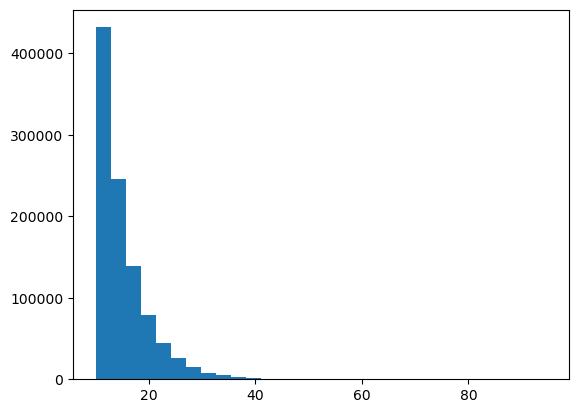

In [11]:
plt.hist(df['X'], 30)
plt.show()

In [13]:
N=100 #size of each sample
K=10000 # number of samples

# initialize vector where I will store information
sample_means= np.zeros(K)
sample_stds= np.zeros(K)

for i in range(K):
    s = np.random.choice(df['X'], N)
    m=np.mean(s)
    sigma=np.std(s)
    sample_means[i]=m
    sample_stds[i]=sigma

mean is 14.992241640106688 and standard error is 0.5023477694715551


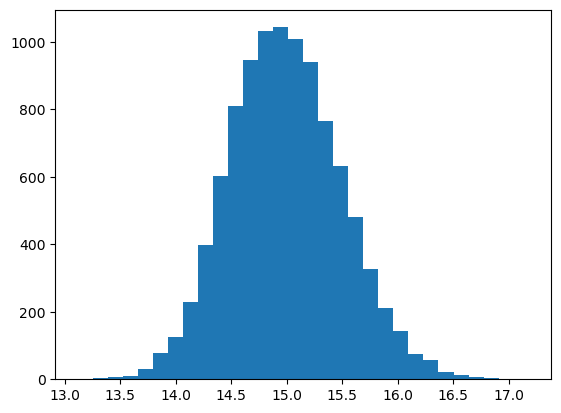

In [17]:
print(f'mean is {np.mean(sample_means)} and standard error is {np.std(sample_means)}')
plt.hist(sample_means, 30)
plt.show()

Theoretical values were:
- mean of samples = 15
- standard error = $\frac{\sigma}{\sqrt{N}} = \frac{5}{\sqrt{100}}=0.5$

So I shoud get about 95% of  the results between $15\pm 1.96*0.5 = [14.02, 15.98]$
Let's verify:

In [20]:
sum((sample_means>14.02) & (sample_means<15.98))/K

0.9507